<a href="https://colab.research.google.com/github/Guillermo-rv/ML/blob/main/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 10: PCA (Unsupervised learning)

## Exercise 1

In [ ]:
# UNSUPERVISED LEARNING
# (BY DEFAULT!!)

# No y (no labels, no target)
# No Train Test Split -> estimator.fit(X) [ estimator.fit(X_train, y_train) -> supervised learning ]
# Scale or not scale depending on the estimator

# Step 1: Reading data
import pandas as pd
df_tech = pd.read_csv("Top_50_US_Tech_Companies_2022-2023.csv")
df_tech = df_tech.select_dtypes(include=['number'])

# Step 2: Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_tech_scaled = scaler.fit_transform(df_tech) # .fit(df_tech) .transform(df_tech)

# Step 3: PCA with all components
from sklearn.decomposition import PCA
pca = PCA(n_components = df_tech_scaled.shape[1])
pca.fit(df_tech_scaled)
df_tech_scaled_pca = pca.transform(df_tech_scaled) # df_tech_scaled_pca = pca.fit_transform(df_tech_scaled)

## Exercise 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pca_optimalComponents(data, max_number_components, threshold):
  pca = PCA(max_number_components)
  pca.fit(data)
  cumsum = np.cumsum(pca.explained_variance_ratio_) # Cumulative sum of EVR
  horiz = range(1, max_number_components+1)
  plt.plot(horiz, cumsum, marker='o')
  plt.hlines(y=threshold, xmin=1, xmax=max_number_components) # horizontal axis from x=1 to x=max_components
  plt.show()

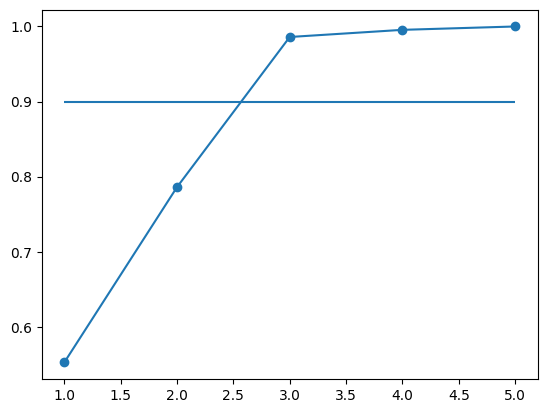

In [ ]:
pca_optimalComponents(df_tech_scaled, df_tech_scaled.shape[1], 0.9)

In [ ]:
pca_opt = PCA(n_components = 3)
df_tech_scaled_pca = pca_opt.fit_transform(df_tech_scaled)

In [ ]:
df_tech_scaled_pca

array([[ 6.91559749e+00, -2.74852521e+00,  4.48185623e-01],
       [ 4.96404940e+00, -2.26970756e+00,  5.23828585e-01],
       [ 4.07881046e+00, -1.28666074e+00, -5.20536262e-01],
       [ 5.57031465e+00,  6.28677122e+00, -1.16342050e+00],
       [ 6.47066079e-02, -3.18736092e-01, -3.52582582e-01],
       [ 6.44955146e-01, -8.30991151e-03, -7.95101038e-01],
       [ 1.22439927e+00, -7.25519457e-01, -7.49761005e-01],
       [-2.28070009e-01, -9.17263329e-02,  9.46322970e-01],
       [ 2.37184695e-03,  2.93981840e-01,  2.65042908e-01],
       [ 1.19996120e-01, -1.76594928e-01,  3.21427910e-02],
       [-3.38019902e-01,  3.90754659e-02, -6.01592600e-01],
       [-4.00767513e-01, -1.92301171e-01,  1.18454519e-01],
       [-3.43391102e-01,  4.04903156e-02,  2.20496611e+00],
       [-5.53314892e-01,  9.31597139e-02,  6.08230639e-01],
       [-1.60586698e-01, -1.71279210e-01, -7.09633012e-03],
       [-4.61121471e-01, -1.75003017e-01, -4.98836132e-01],
       [-1.94620236e-01,  5.91551431e-01

In [ ]:
pd.DataFrame(df_tech_scaled_pca).corr()

,0,1,2
0,1.000000e+00,3.075462e-17,-1.035437e-16
1,3.075462e-17,1.000000e+00,1.336043e-17
2,-1.035437e-16,1.336043e-17,1.000000e+00


In [ ]:
'''
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler', StandardScaler()),
          ('pca', PCA())])
pipeline.fit(df_tech)
pipeline['pca'].explained_variance_ratio_
''';

## Exercise 3

In [ ]:
df_tech_inversed = pca_opt.inverse_transform(df_tech_scaled_pca)
df_tech_unScaled = scaler.inverse_transform(df_tech_inversed) # 2 options: Check the difference between the original data & the inversed after PCA
                                # 1)using the scaled 2)original range

In [ ]:
df_tech_unScaled

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
reconstruction_error = []

for i in range(len(df_tech_inversed)):
  #error_instance_i = mean_squared_error(df_tech.iloc[i], df_tech_unScaled[i])
  error_instance_i = mean_absolute_percentage_error(df_tech.iloc[i], df_tech_unScaled[i])
  reconstruction_error.append(error_instance_i)

In [ ]:
df_tech.iloc[np.argmax(reconstruction_error)]

Founding Year                                        1993.000
Annual Revenue 2022-2023 (USD in Billions)             26.970
Market Cap (USD in Trillions)                           0.653
Annual Income Tax in 2022-2023 (USD in Billions)        0.189
Employee Size                                       22473.000
Name: 4, dtype: float64

In [ ]:
np.max(reconstruction_error)

2.449322478309583

In [ ]:
df_tech_unScaled[np.argmax(reconstruction_error)]

# 2 ways of using the inverse_transform of PCA:
# 1) Identifying rows with "noise" (check one by one manually)
# 2) If you apply a model after PCA, keep in mind that you are loosing "a lot" of information in that row

array([1.99357324e+03, 4.91005738e+01, 3.10174246e-01, 2.07742874e+00,
       4.29026318e+04])

In [ ]:
reconstruction_error

## Session 11: LDA

In [ ]:
import pandas as pd

In [ ]:
# Data
data = pd.read_csv("air_quality_health_impact_data.csv").drop(columns=['RecordID', 'HealthImpactScore'])
X = data.drop(columns=['HealthImpactClass'])
y = data['HealthImpactClass']

# Training test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y) # Stratify can be interesting!

# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Getting the optimal number of components for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_max = LinearDiscriminantAnalysis(n_components=len(y.value_counts())-1)
lda_max.fit(X_train_scaled, y_train) # Only the training

LinearDiscriminantAnalysis(n_components=4)

In [ ]:
lda_max.explained_variance_ratio_ # With only 1 component 0.96 explained variance!!
# Threshold between 95% of explained variance ratio
# How many components (minimum) do I need in order to achieve at least 95% of the explained variance ratio?

array([0.96656858, 0.02733813, 0.003582  , 0.00251129])

In [ ]:
import numpy as np
np.cumsum(lda_max.explained_variance_ratio_)

array([0.96656858, 0.99390671, 0.99748871, 1.        ])

In [ ]:
X_train_scaled.shape (4358, 12) -> X_train_lda.shape (4358, 1)

(4358, 12)

In [ ]:
# LDA -> dim red - .transform() (ex2) /// classification .predict()  (ex3)

# Exercise 2: Result of LDA to SVM model
lda_optimal = LinearDiscriminantAnalysis(n_components=1)
lda_optimal.fit(X_train_scaled, y_train)
X_train_lda = lda_optimal.transform(X_train_scaled)
X_test_lda = lda_optimal.transform(X_test_scaled)

from sklearn.svm import SVC
# GridSearchCV with C (0.001, 0.01, 0.1, 1, 10, 100), gamma (0.001, 0.01, 0.1, 1, 10, 100), kernel (poly, rbf, linear)
svm = SVC(class_weight="balanced", C=100, gamma=100)
svm.fit(X_train_lda, y_train)
y_train_predicted_svm = svm.predict(X_train_lda)
y_test_predicted_svm = svm.predict(X_test_lda)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
print("\nTraining")
print(accuracy_score(y_train, y_train_predicted_svm))
print(balanced_accuracy_score(y_train, y_train_predicted_svm))
print("\nTest")
print(accuracy_score(y_test, y_test_predicted_svm))
print(balanced_accuracy_score(y_test, y_test_predicted_svm))


Training
0.59889857732905
0.7179663270595478

Test
0.5994494150034412
0.5792183308575022


In [ ]:
confusion_matrix(y_train, y_train_predicted_svm)

array([[2756,  195,    2,    0,  653],
       [  26,  361,   39,    0,    8],
       [  28,   23,  136,    8,   10],
       [  28,    7,    5,   26,    5],
       [  26,    7,    2,    0,    7]])

In [ ]:
y_train.value_counts()

HealthImpactClass
0.0    3606
1.0     434
2.0     205
3.0      71
4.0      42
Name: count, dtype: int64

### Exercise 3

In [ ]:
# Use LDA as a Classification algorithm (using the original training and test data)
lda_class = LinearDiscriminantAnalysis()
lda_class.fit(X_train_scaled, y_train)
y_train_lda_class = lda_class.predict(X_train_scaled)
y_test_lda_class = lda_class.predict(X_test_scaled)

In [ ]:
print("\nTraining")
print(accuracy_score(y_train, y_train_lda_class))
print(balanced_accuracy_score(y_train, y_train_lda_class))
print("\nTest")
print(accuracy_score(y_test, y_test_lda_class))
print(balanced_accuracy_score(y_test, y_test_lda_class))


Training
0.851537402478201
0.25886924063655475

Test
0.8499655884377151
0.2576632252533809
